In [15]:
import pandas
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

In [16]:
L = [f"../Data/Big/chartevents_20230706_{i}_labeled.csv" for i in range(330)]

In [17]:
df = pandas.concat((pandas.read_csv(i, engine='python', dtype={"label":bool}) for i in L), ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463400 entries, 0 to 6463399
Data columns (total 9 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   hadm_id                                object 
 1   charttime                              object 
 2   Heart Rate                             float64
 3   Respiratory Rate                       float64
 4   Non Invasive Blood Pressure systolic   float64
 5   Non Invasive Blood Pressure diastolic  float64
 6   O2 saturation pulseoxymetry            float64
 7   Temperature Celsius                    float64
 8   label                                  bool   
dtypes: bool(1), float64(6), object(2)
memory usage: 400.7+ MB


In [18]:
mark = ("Heart Rate", \
        "Respiratory Rate", \
        "Non Invasive Blood Pressure systolic", \
        "Non Invasive Blood Pressure diastolic", \
        "O2 saturation pulseoxymetry", \
        "Temperature Celsius")
df.dropna(how='any', inplace=True)
df_under, df_under_label = df[list(mark)], df.label

In [19]:
print("Before\t", sum(df_under_label) / len(df_under_label))
df_under_resample, df_under_label_resample = RandomUnderSampler(sampling_strategy='majority').fit_resample(df_under, df_under_label)
print("After \t", sum(df_under_label_resample) / len(df_under_label_resample))

Before	 0.0007234156171054704
After 	 0.5


In [20]:
df_under_resample = (df_under_resample - df_under_resample.mean()) / df_under_resample.std()
df_under_resample.sample(5)

,Heart Rate,Respiratory Rate,Non Invasive Blood Pressure systolic,Non Invasive Blood Pressure diastolic,O2 saturation pulseoxymetry,Temperature Celsius
1684,1.107194,0.429822,0.173091,0.254299,0.448542,0.005624
410,-1.212618,0.034630,0.399204,-1.284322,-0.382560,-0.340937
1242,-0.200336,-0.228832,-1.485067,-0.515012,0.448542,-0.837676
490,-0.284693,-0.228832,-0.392190,-0.789766,0.032991,-0.063688
218,0.685410,-0.360563,-0.618302,-1.559076,0.448542,0.167353


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_under_resample, df_under_label_resample, test_size=0.2, stratify=df_under_label_resample)
len(X_train), len(X_test)

(1521, 381)

[Text(0.5, 0.875, 'x[4] <= -0.435\ngini = 0.5\nsamples = 1521\nvalue = [760, 761]'),
 Text(0.25, 0.625, 'x[4] <= -0.954\ngini = 0.199\nsamples = 170\nvalue = [19, 151]'),
 Text(0.125, 0.375, 'x[0] <= 0.706\ngini = 0.088\nsamples = 108\nvalue = [5, 103]'),
 Text(0.0625, 0.125, 'gini = 0.146\nsamples = 63\nvalue = [5, 58]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 45\nvalue = [0, 45]'),
 Text(0.375, 0.375, 'x[1] <= 0.496\ngini = 0.35\nsamples = 62\nvalue = [14, 48]'),
 Text(0.3125, 0.125, 'gini = 0.461\nsamples = 36\nvalue = [13, 23]'),
 Text(0.4375, 0.125, 'gini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.75, 0.625, 'x[2] <= -0.863\ngini = 0.495\nsamples = 1351\nvalue = [741, 610]'),
 Text(0.625, 0.375, 'x[5] <= -0.116\ngini = 0.394\nsamples = 189\nvalue = [51, 138]'),
 Text(0.5625, 0.125, 'gini = 0.261\nsamples = 123\nvalue = [19, 104]'),
 Text(0.6875, 0.125, 'gini = 0.5\nsamples = 66\nvalue = [32, 34]'),
 Text(0.875, 0.375, 'x[0] <= 0.833\ngini = 0.482\nsamples = 1162\nvalue

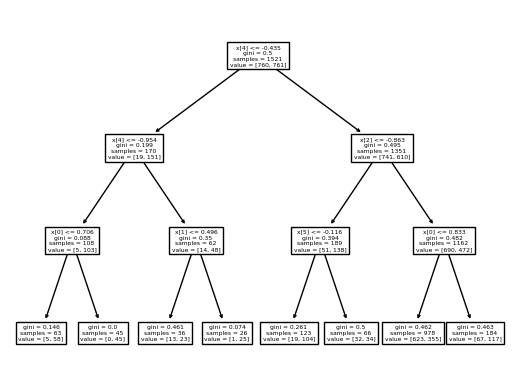

In [22]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train, y_train)
tree.plot_tree(model)

In [23]:
from graphviz import Source
features = list(mark)
dot_data = tree.export_graphviz(model, feature_names=features)
graph = Source(dot_data)
graph.render(view=True, format="pdf", filename="../Charts/Big")

'../Charts/Big.pdf'

In [24]:
model.score(X_test, y_test)

0.7007874015748031

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold

In [29]:
scores = 0
for i in range(100):
    scores += cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy').mean()
print(f"{round(scores, 2)}%")

63.81%


In [32]:
cross_val_score(tree.DecisionTreeClassifier(max_depth=3), df_under_resample, df_under_label_resample, cv=5, scoring='accuracy').mean()

0.6009241607956901